Time series.Sequence of observations collected over time - usually at regular intervals
- cannot be randomly shaffled because its ordinal data(categorical data)
#### componets
1. Trend
2. Seasonality repeating patterns
3. Cyclic patterns

Time series = Trend + seasonality + noise
- ML does not understand time convert to features
- lag features
#### Rolling statistics
- capture local trends
- rolling mean (7days)
- rolling standard deviation

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error # get prediction error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # This is due to non linear patterns
from sklearn.svm import SVR # help to capture non linear patterns avoid over fitting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('callls.csv')
df.head()

,StartDateTime,UserId,CallType,disconnectType,Total_Handle_Time,Total_Hold_Time,Total_Talk_Time,Unnamed: 7,Unnamed: 8
0,1/1/2023 5:01:42 AM,da7fadb4-cad9-4062-8271-bbc999ac1275,Inbound_Queue,endpoint,1188.162,0.000,1075.162,NaN,NaN
1,1/1/2023 5:11:53 AM,af512203-3ea2-48d5-bbf5-e46ae915d4d8,Inbound_Queue,peer,396.923,0.000,216.923,NaN,NaN
2,1/1/2023 5:24:17 AM,6b633a32-ec20-48f4-91dd-503d459eda1f,Inbound_Queue,peer,537.893,173.363,361.544,NaN,NaN
3,1/1/2023 6:01:03 AM,63bb6f93-004c-4a79-8d01-7de24f75241b,Inbound_Queue,peer,266.625,0.000,263.625,NaN,NaN
4,1/1/2023 6:04:02 AM,e47ca893-1edc-49e9-b0bd-58cde8182443,Inbound_Queue,peer,2545.198,856.591,1674.901,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135859 entries, 0 to 135858
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   StartDateTime      135859 non-null  object 
 1   UserId             135859 non-null  object 
 2   CallType           135859 non-null  object 
 3   disconnectType     135830 non-null  object 
 4   Total_Handle_Time  135859 non-null  float64
 5   Total_Hold_Time    135859 non-null  float64
 6   Total_Talk_Time    135859 non-null  float64
 7   Unnamed: 7         0 non-null       float64
 8   Unnamed: 8         0 non-null       float64
dtypes: float64(5), object(4)
memory usage: 9.3+ MB


In [4]:
df= df.drop(columns=["Unnamed: 7","Unnamed: 8"])# remove columns
df.head()

,StartDateTime,UserId,CallType,disconnectType,Total_Handle_Time,Total_Hold_Time,Total_Talk_Time
0,1/1/2023 5:01:42 AM,da7fadb4-cad9-4062-8271-bbc999ac1275,Inbound_Queue,endpoint,1188.162,0.000,1075.162
1,1/1/2023 5:11:53 AM,af512203-3ea2-48d5-bbf5-e46ae915d4d8,Inbound_Queue,peer,396.923,0.000,216.923
2,1/1/2023 5:24:17 AM,6b633a32-ec20-48f4-91dd-503d459eda1f,Inbound_Queue,peer,537.893,173.363,361.544
3,1/1/2023 6:01:03 AM,63bb6f93-004c-4a79-8d01-7de24f75241b,Inbound_Queue,peer,266.625,0.000,263.625
4,1/1/2023 6:04:02 AM,e47ca893-1edc-49e9-b0bd-58cde8182443,Inbound_Queue,peer,2545.198,856.591,1674.901


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135859 entries, 0 to 135858
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   StartDateTime      135859 non-null  object 
 1   UserId             135859 non-null  object 
 2   CallType           135859 non-null  object 
 3   disconnectType     135830 non-null  object 
 4   Total_Handle_Time  135859 non-null  float64
 5   Total_Hold_Time    135859 non-null  float64
 6   Total_Talk_Time    135859 non-null  float64
dtypes: float64(3), object(4)
memory usage: 7.3+ MB


In [6]:
df['StartDateTime']=pd.to_datetime(df['StartDateTime'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135859 entries, 0 to 135858
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   StartDateTime      135859 non-null  datetime64[ns]
 1   UserId             135859 non-null  object        
 2   CallType           135859 non-null  object        
 3   disconnectType     135830 non-null  object        
 4   Total_Handle_Time  135859 non-null  float64       
 5   Total_Hold_Time    135859 non-null  float64       
 6   Total_Talk_Time    135859 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 7.3+ MB


In [7]:
df = df.sort_values('StartDateTime').reset_index(drop=True)

In [8]:
target ='Total_Handle_Time'

In [9]:
df= df.set_index('StartDateTime')
ts = df.resample("10T").agg({
    'Total_Handle_Time':'mean',
    'Total_Hold_Time':'mean',
    'Total_Talk_Time':'mean',

})

C:\Users\cnjer\AppData\Local\Temp\ipykernel_30184\2799041747.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts = df.resample("10T").agg({


In [10]:
ts.head()

,Total_Handle_Time,Total_Hold_Time,Total_Talk_Time
StartDateTime,,,
2023-01-01 05:00:00,1188.162,0.000,1075.162
2023-01-01 05:10:00,396.923,0.000,216.923
2023-01-01 05:20:00,537.893,173.363,361.544
2023-01-01 05:30:00,NaN,NaN,NaN
2023-01-01 05:40:00,NaN,NaN,NaN


In [11]:
#Model or Ml does not know the past , The lag give the ML memory 
#important to remove null values
ts = ts.dropna()

In [12]:
ts.head()

,Total_Handle_Time,Total_Hold_Time,Total_Talk_Time
StartDateTime,,,
2023-01-01 05:00:00,1188.162000,0.000000,1075.162000
2023-01-01 05:10:00,396.923000,0.000000,216.923000
2023-01-01 05:20:00,537.893000,173.363000,361.544000
2023-01-01 06:00:00,1279.849333,292.399333,981.214667
2023-01-01 06:10:00,1486.984000,291.098500,1060.135500


In [13]:
ts['lag_1']= ts[target].shift(1)
ts['lag_2']= ts[target].shift(2)
ts['lag_3']= ts[target].shift(3)
ts


,Total_Handle_Time,Total_Hold_Time,Total_Talk_Time,lag_1,lag_2,lag_3
StartDateTime,,,,,,
2023-01-01 05:00:00,1188.162000,0.000000,1075.162000,NaN,NaN,NaN
2023-01-01 05:10:00,396.923000,0.000000,216.923000,1188.162000,NaN,NaN
2023-01-01 05:20:00,537.893000,173.363000,361.544000,396.923000,1188.162000,NaN
2023-01-01 06:00:00,1279.849333,292.399333,981.214667,537.893000,396.923000,1188.162000
2023-01-01 06:10:00,1486.984000,291.098500,1060.135500,1279.849333,537.893000,396.923000
...,...,...,...,...,...,...
2023-03-15 18:10:00,1558.753167,416.483333,1003.228000,1257.826500,1469.373857,1355.773333
2023-03-15 18:20:00,834.522000,23.573500,692.767250,1558.753167,1257.826500,1469.373857
2023-03-15 18:30:00,1491.483750,53.915250,1257.568500,834.522000,1558.753167,1257.826500


In [27]:
#Rolling statistics
ts['rolling_mean_3'] = ts[target].shift(1).rolling(3).mean()
ts['rolling_std_3']=ts[target].shift(1).rolling(3).std()
ts


C:\Users\cnjer\AppData\Local\Temp\ipykernel_30184\3088847550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['rolling_mean_3'] = ts[target].shift(1).rolling(3).mean()
C:\Users\cnjer\AppData\Local\Temp\ipykernel_30184\3088847550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['rolling_std_3']=ts[target].shift(1).rolling(3).std()


,Total_Handle_Time,Total_Hold_Time,Total_Talk_Time,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3
StartDateTime,,,,,,,,
2023-01-01 06:00:00,1279.849333,292.399333,981.214667,537.893000,396.923000,1188.162000,NaN,NaN
2023-01-01 06:10:00,1486.984000,291.098500,1060.135500,1279.849333,537.893000,396.923000,NaN,NaN
2023-01-01 06:20:00,656.413000,0.000000,476.413000,1486.984000,1279.849333,537.893000,NaN,NaN
2023-01-01 06:30:00,1156.589000,388.979000,587.610000,656.413000,1486.984000,1279.849333,1141.082111,432.324303
2023-01-01 06:40:00,806.433000,133.788400,509.644600,1156.589000,656.413000,1486.984000,1099.995333,418.167644
...,...,...,...,...,...,...,...,...
2023-03-15 18:10:00,1558.753167,416.483333,1003.228000,1257.826500,1469.373857,1355.773333,1360.991230,105.870161
2023-03-15 18:20:00,834.522000,23.573500,692.767250,1558.753167,1257.826500,1469.373857,1428.651175,154.541151
2023-03-15 18:30:00,1491.483750,53.915250,1257.568500,834.522000,1558.753167,1257.826500,1217.033889,363.834748


In [28]:
ts =ts.dropna()

In [29]:
X= ts[['lag_1','lag_2','lag_3','rolling_mean_3','rolling_std_3']]
y = ts[target]



Baseline Model

In [30]:
split = int(len(ts)*0.7)
X_train,X_test =X[:split],X[split:]
y_train,y_test = y[:split],y[split:]


In [32]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred = lr.predict(X_test)

mean_absolute_error(y_test,pred)


242.97067515906514

In [33]:
242.97/60

4.0495

In [34]:
rf = RandomForestRegressor(n_estimators=300,random_state=42)
rf.fit(X_train,y_train)
pred_rf= rf.predict(X_test)

In [35]:
mean_absolute_error(y_test,pred_rf)

255.68238968989473

In [37]:
svr = Pipeline([('scaler',StandardScaler()),
                ('svr',SVR(kernel='rbf',C=100,gamma=0.1))])

svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)

In [38]:
mean_absolute_error(y_test,pred_svr)

241.61921744895255

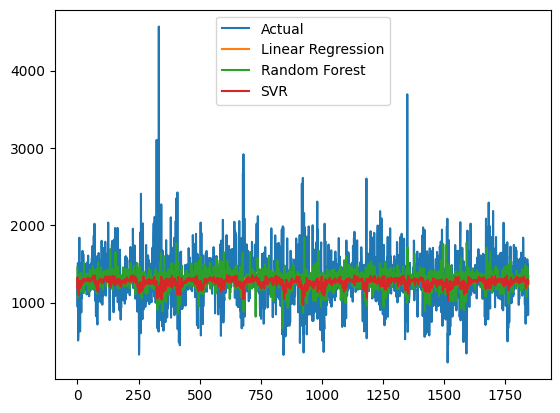

In [ ]:
plt.Figure(figsize=(12,5))
plt.plot(y_test.values,label='Actual')
plt.plot(pred,label='Linear Regression')
plt.plot(pred_rf,label='Random Forest')
plt.plot(pred_svr,label='SVR')
plt.legend()
#Focus comparison plot, this data is noisy and unpredictable